In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

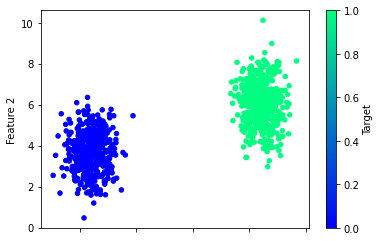

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 588us/step - loss: 0.7790 - accuracy: 0.4733
Epoch 2/100
24/24 [==============================] - 0s 834us/step - loss: 0.7540 - accuracy: 0.3253
Epoch 3/100
24/24 [==============================] - 0s 768us/step - loss: 0.7328 - accuracy: 0.3680
Epoch 4/100
24/24 [==============================] - 0s 734us/step - loss: 0.7161 - accuracy: 0.4133
Epoch 5/100
24/24 [==============================] - 0s 903us/step - loss: 0.7032 - accuracy: 0.4680
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5813
Epoch 8/100
24/24 [==============================] - 0s 938us/step - loss: 0.6757 - accuracy: 0.6347
Epoch 9/100
24/24 [==============================] - 0s 960us/step - loss: 0.6647 - accuracy: 0.7067
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.

24/24 [==============================] - 0s 594us/step - loss: 0.0998 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 607us/step - loss: 0.0982 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 608us/step - loss: 0.0966 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 606us/step - loss: 0.0950 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 563us/step - loss: 0.0935 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 611us/step - loss: 0.0920 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 578us/step - loss: 0.0905 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 573us/step - loss: 0.0891 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 571us/step - loss: 0.0877 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 583us/step - loss: 0.0863 - accuracy: 

<AxesSubplot:>

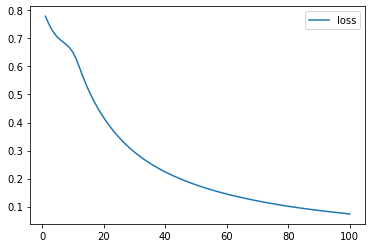

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

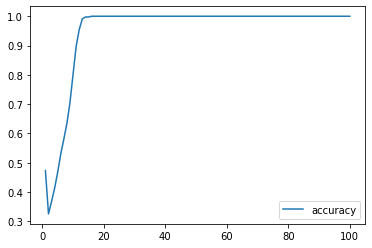

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0760 - accuracy: 1.0000
Loss: 0.07600470632314682, Accuracy: 1.0


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [20]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict(new_X_scaled)


array([[0.01008037],
       [0.87051713],
       [0.00443614],
       [0.87051713],
       [0.00865817],
       [0.00720268],
       [0.87051713],
       [0.87051713],
       [0.87051713],
       [0.0077652 ]], dtype=float32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

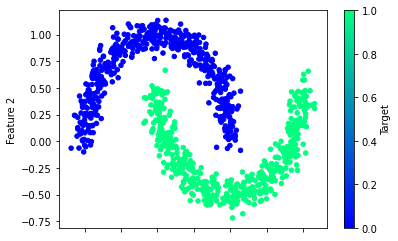

In [21]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [22]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [23]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 875us/step - loss: 0.8127 - accuracy: 0.5880
Epoch 2/100
24/24 [==============================] - 0s 882us/step - loss: 0.6990 - accuracy: 0.6200
Epoch 3/100
24/24 [==============================] - 0s 970us/step - loss: 0.6193 - accuracy: 0.6507
Epoch 4/100
24/24 [==============================] - 0s 982us/step - loss: 0.5646 - accuracy: 0.6787
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.6987
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7133
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7320
Epoch 8/100
24/24 [==============================] - 0s 951us/step - loss: 0.4410 - accuracy: 0.7467
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.7693
Epoch 10/100
24/24 [==============================] - 0s 957us/step - loss: 0.4042 - accuracy: 0.77

24/24 [==============================] - 0s 937us/step - loss: 0.2577 - accuracy: 0.8933
Epoch 82/100
24/24 [==============================] - 0s 976us/step - loss: 0.2577 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 919us/step - loss: 0.2575 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 918us/step - loss: 0.2573 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 885us/step - loss: 0.2571 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 896us/step - loss: 0.2570 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 867us/step - loss: 0.2570 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 874us/step - loss: 0.2567 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 824us/step - loss: 0.2566 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 836us/step - loss: 0.2565 - accuracy: 

<AxesSubplot:>

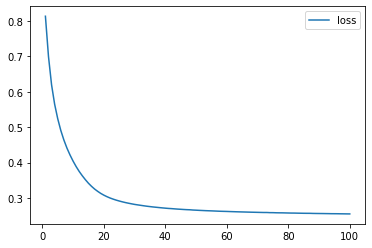

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

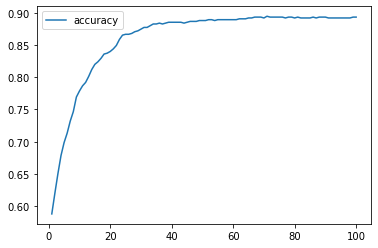

In [25]:
# Plot the accuracy
history_df.plot(y="accuracy")

##### 
According to the accuracy metric, the basic single-neuron, single-layer neural network model was only able to correctly classify 89% of all data points in the nonlinear training data. Depending on a person's use case, 89% accuracy could be sufficient for a first-pass model. For example, if we were trying to use a neural network model to separate left-handed people from right-handed people, a model that is correct 89% of the time is very accurate, and guessing incorrectly does not have a huge negative impact.

However, in many industrial and medical use cases, a model's classification accuracy must exceed 95% or even 99%. In these cases, we wouldn't be satisfied with the basic single-neuron, single-layer neural network model, and we would have to design a more robust neural network. In summary, the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to achieve our desired performance.

In [26]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [27]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [28]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 661us/step - loss: 0.7550 - accuracy: 0.2733
Epoch 2/100
24/24 [==============================] - 0s 638us/step - loss: 0.7153 - accuracy: 0.3533
Epoch 3/100
24/24 [==============================] - 0s 656us/step - loss: 0.6779 - accuracy: 0.4333
Epoch 4/100
24/24 [==============================] - 0s 658us/step - loss: 0.6437 - accuracy: 0.5093
Epoch 5/100
24/24 [==============================] - 0s 629us/step - loss: 0.6131 - accuracy: 0.5640
Epoch 6/100
24/24 [==============================] - 0s 732us/step - loss: 0.5857 - accuracy: 0.6293
Epoch 7/100
24/24 [==============================] - 0s 827us/step - loss: 0.5615 - accuracy: 0.7080
Epoch 8/100
24/24 [==============================] - 0s 757us/step - loss: 0.5407 - accuracy: 0.8093
Epoch 9/100
24/24 [==============================] - 0s 707us/step - loss: 0.5223 - accuracy: 0.8520
Epoch 10/100
24/24 [==============================] - 0s 678us/step - loss: 0.5061 - accura

24/24 [==============================] - 0s 701us/step - loss: 0.2521 - accuracy: 0.8973
Epoch 82/100
24/24 [==============================] - 0s 712us/step - loss: 0.2514 - accuracy: 0.8973
Epoch 83/100
24/24 [==============================] - 0s 810us/step - loss: 0.2506 - accuracy: 0.8973
Epoch 84/100
24/24 [==============================] - 0s 729us/step - loss: 0.2499 - accuracy: 0.8973
Epoch 85/100
24/24 [==============================] - 0s 714us/step - loss: 0.2491 - accuracy: 0.8973
Epoch 86/100
24/24 [==============================] - 0s 676us/step - loss: 0.2485 - accuracy: 0.8973
Epoch 87/100
24/24 [==============================] - 0s 634us/step - loss: 0.2479 - accuracy: 0.8987
Epoch 88/100
24/24 [==============================] - 0s 610us/step - loss: 0.2472 - accuracy: 0.8987
Epoch 89/100
24/24 [==============================] - 0s 624us/step - loss: 0.2465 - accuracy: 0.8987
Epoch 90/100
24/24 [==============================] - 0s 637us/step - loss: 0.2459 - accuracy: 

### Practice Encoding Categorical Variables

In [30]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Poland             4
Holland            4
Dubai              3
Sweden             3
Finland            3
Sarawak            3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

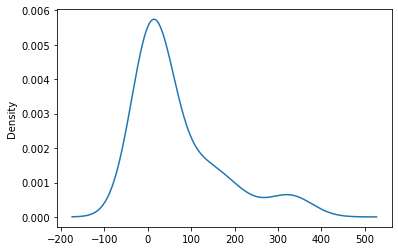

In [31]:
# Visualize the value counts
country_counts.plot.density()

In [32]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [33]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Standardization Practice

In [35]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [36]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [37]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [38]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [39]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656
